In [18]:
from urllib.request import Request,urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [19]:
finvz_url="https://finviz.com/quote.ashx?t="

In [20]:
tickers=['AAPL','GOOG','MSFT','WMT']

In [36]:
news_tables={}
for ticker in tickers:
    url=finvz_url+ticker

    req=Request(url=url,headers = {'User-Agent': 'Mozilla/5.0'})
    response=urlopen(req)
    html=BeautifulSoup(response,'html')
    news_table=html.find(id="news-table")
    news_tables[ticker]=news_table
    
print(news_tables)

{'AAPL': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer news-table" id="news-table" width="100%">
<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Investor\u0027s Business Daily', 'https://finance.yahoo.com/m/4205eaa9-f620-3a0b-a81a-0e82c7c9fd0b/magnificent-seven-stocks%3A.html');">
<td align="right" width="130">
            Today 10:21AM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news" href="https://finance.yahoo.com/m/4205eaa9-f620-3a0b-a81a-0e82c7c9fd0b/magnificent-seven-stocks%3A.html" rel="nofollow" target="_blank">Magnificent Seven Stocks: Nvidia Stock Tumbles; Amazon, Tesla Rally To New Highs</a>
</div>
<div class="news-link-right">
<span>(Investor's Business Daily)</span></div></div></td></tr>
<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Yahoo Finance Video', 'https://finance.yahoo.com/video/mag-7s-profit-growth-forecasted-15121518

In [22]:
# HDFC_data=news_tables['HDB']
# HDFC_rows=HDFC_data.find_all('tr')
# print(HDFC_rows)

In [23]:
# for index, row in enumerate(HDFC_rows):
#     title=row.a.text
#     timestamp=row.td.text
#     print(timestamp + " " + title)

In [24]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.find_all('tr'):
        # Extract the title
        title = row.a.text.strip() if row.a else "No Title"

        # Extract date and time
        date_data = row.td.text.strip().split(' ') if row.td else ["No Date"]

        if len(date_data) == 1:  # If only time is present
            date = "No Date"
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        # Append parsed data to the list
        parsed_data.append([ticker, date, time, title])

# Print the parsed data
# for data in parsed_data:
#     print(data)

print(parsed_data)

[['AAPL', 'Today', '10:01AM', 'Magnificent Seven Stocks: Nvidia Stock Tumbles; Amazon, Tesla Rally To New Highs'], ['AAPL', 'No Date', '09:03AM', 'Trump Is on Collision Course With EU Over Big Tech Crackdown'], ['AAPL', 'No Date', '08:32AM', 'Omnicom to Acquire Interpublic in Deal That Will Reshape Advertising Industry'], ['AAPL', 'No Date', '08:24AM', "Apple, Nvidia, and Microsoft are America's best-managed companies right now, report says"], ['AAPL', 'No Date', '08:24AM', 'A Class Action Lawsuit filed on Saturday states that Apple failed to properly find and delete child sexual abuse material from iCloud'], ['AAPL', 'No Date', '08:10AM', 'Forte: Apple shares bake in the A.I. fueled upgrade cycle.'], ['AAPL', 'No Date', '08:09AM', 'Apple Inc. (AAPL) Faces Setbacks in China as AI Integration Struggles with Baidu, Impacting iPhone 16 Sales'], ['AAPL', 'No Date', '06:00AM', "Beyond Market Price: Uncovering Apple Inc's Intrinsic Value"], ['AAPL', 'No Date', '05:32AM', 'Where Will Apple Be

In [25]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [26]:
df = pd.DataFrame(parsed_data, columns=["ticker", "date", "time", "title"])

# Display the DataFrame
df.head()

,ticker,date,time,title
0,AAPL,Today,10:01AM,Magnificent Seven Stocks: Nvidia Stock Tumbles...
1,AAPL,No Date,09:03AM,Trump Is on Collision Course With EU Over Big ...
2,AAPL,No Date,08:32AM,Omnicom to Acquire Interpublic in Deal That Wi...
3,AAPL,No Date,08:24AM,"Apple, Nvidia, and Microsoft are America's bes..."
4,AAPL,No Date,08:24AM,A Class Action Lawsuit filed on Saturday state...


In [27]:

# Step 2: Instantiate the SentimentIntensityAnalyzer
vadar = SentimentIntensityAnalyzer()

# Step 3: Define a function to calculate the compound score and handle missing data
def f(title):
    if isinstance(title, str):  
        return vadar.polarity_scores(title)['compound']
    return 0.0  # Return neutral sentiment (0.0) for missing or invalid titles

# Step 4: Apply the function to the 'title' column and create a new 'compound' column
df['compound'] = df['title'].apply(f)

# Step 5: Display the updated DataFrame
df.head()

,ticker,date,time,title,compound
0,AAPL,Today,10:01AM,Magnificent Seven Stocks: Nvidia Stock Tumbles...,0.6808
1,AAPL,No Date,09:03AM,Trump Is on Collision Course With EU Over Big ...,-0.3612
2,AAPL,No Date,08:32AM,Omnicom to Acquire Interpublic in Deal That Wi...,0.0000
3,AAPL,No Date,08:24AM,"Apple, Nvidia, and Microsoft are America's bes...",0.0000
4,AAPL,No Date,08:24AM,A Class Action Lawsuit filed on Saturday state...,-0.8555


In [28]:
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date


<ipython-input-28-cd635b6e44dc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date


In [29]:
df.head()

,ticker,date,time,title,compound
0,AAPL,NaT,10:01AM,Magnificent Seven Stocks: Nvidia Stock Tumbles...,0.6808
1,AAPL,NaT,09:03AM,Trump Is on Collision Course With EU Over Big ...,-0.3612
2,AAPL,NaT,08:32AM,Omnicom to Acquire Interpublic in Deal That Wi...,0.0000
3,AAPL,NaT,08:24AM,"Apple, Nvidia, and Microsoft are America's bes...",0.0000
4,AAPL,NaT,08:24AM,A Class Action Lawsuit filed on Saturday state...,-0.8555


In [30]:
# Ensure the 'date' column is in the correct format (datetime or date)
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date

# Group by 'ticker' and 'date' and compute the mean for only numeric columns
mean_df = df.groupby(['ticker', 'date']).mean(numeric_only=True)

mean_df=mean_df.unstack()
mean_df=mean_df.xs('compound',axis="columns").transpose()
# Print the mean dataframe
m_df=mean_df.head(20)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1440x1080 with 0 Axes>

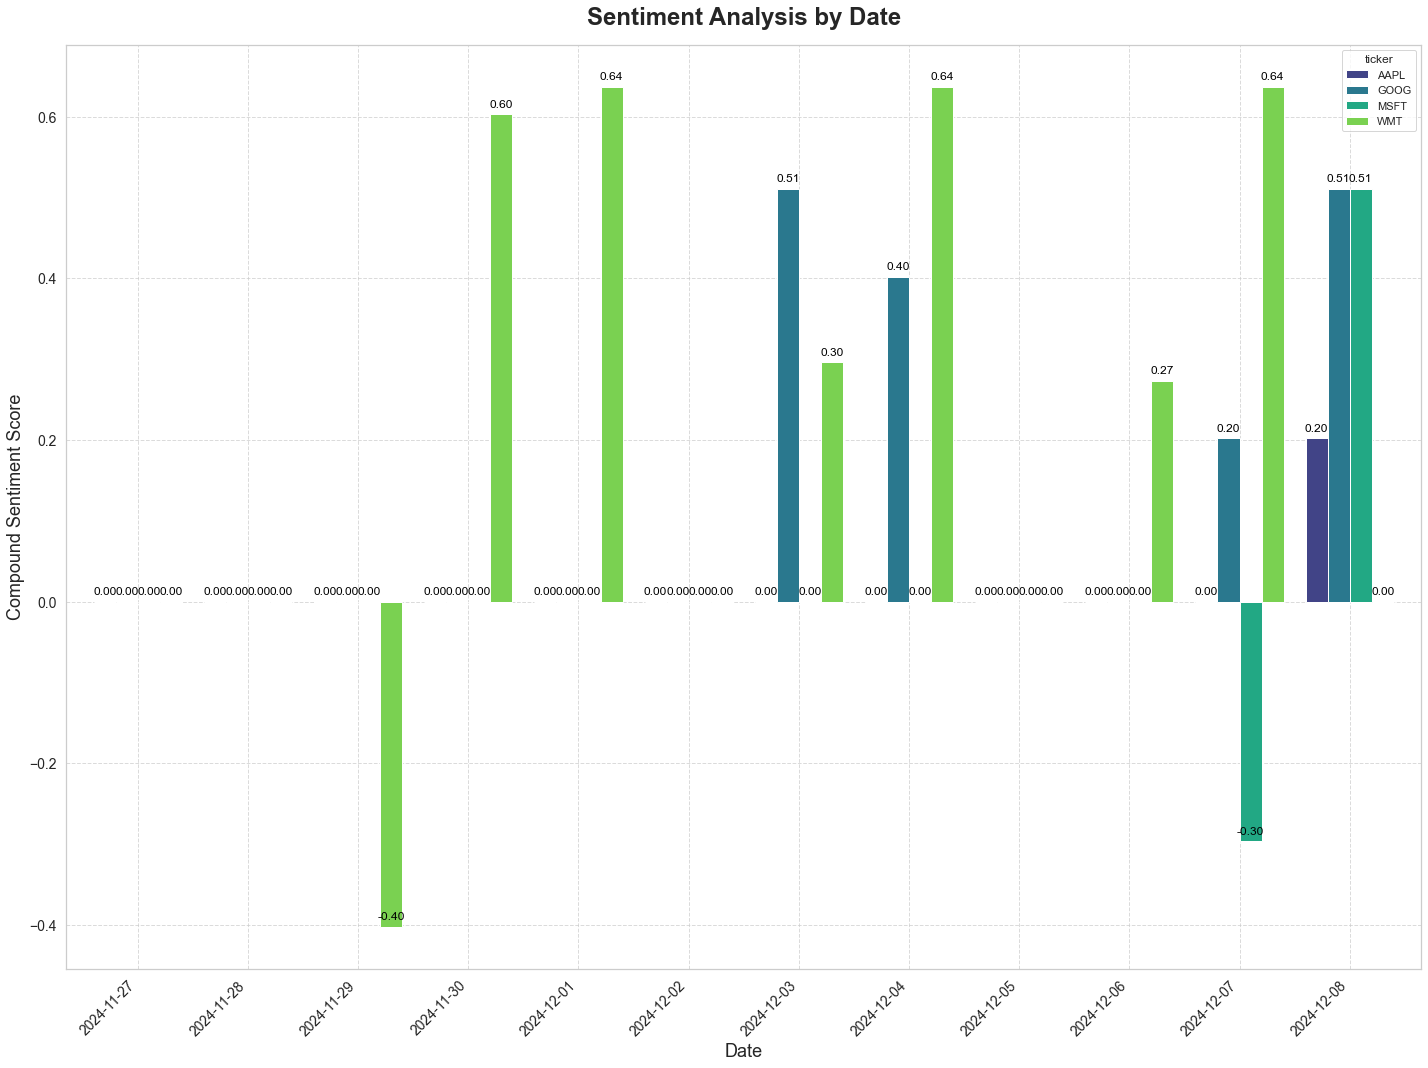

In [32]:

plt.figure(figsize=(20, 15))
sns.set_theme(style="whitegrid")

# Create the bar chart with seaborn
ax = m_df.plot(kind="bar", width=0.8, color=sns.color_palette("viridis", len(m_df.columns)), figsize=(20, 15))

# Customize the plot with title, axis labels, and grid
plt.title('Sentiment Analysis by Date', fontsize=24, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Compound Sentiment Score', fontsize=18)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 10), textcoords='offset points')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-33-cf970d7ab70c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_dates.values, y=top_10_dates.index, palette="viridis")


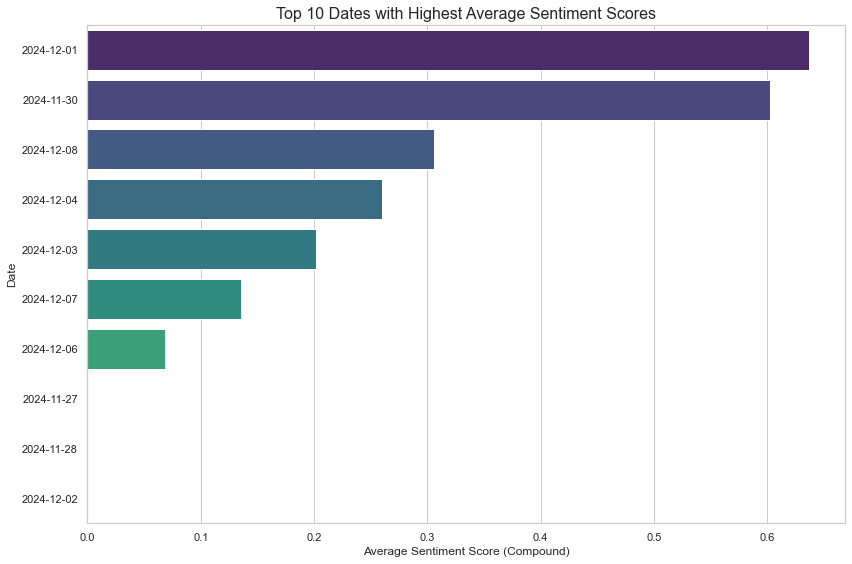

In [33]:


# Sort the mean sentiment scores by date and select the top 10 dates
top_10_dates = mean_df.mean(axis=1).sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Seaborn style for clean grid background

# Create a horizontal bar chart
sns.barplot(x=top_10_dates.values, y=top_10_dates.index, palette="viridis")

# Add labels and title
plt.title('Top 10 Dates with Highest Average Sentiment Scores', fontsize=16)
plt.xlabel('Average Sentiment Score (Compound)', fontsize=12)
plt.ylabel('Date', fontsize=12)

# Show the chart
plt.tight_layout();
plt.show();

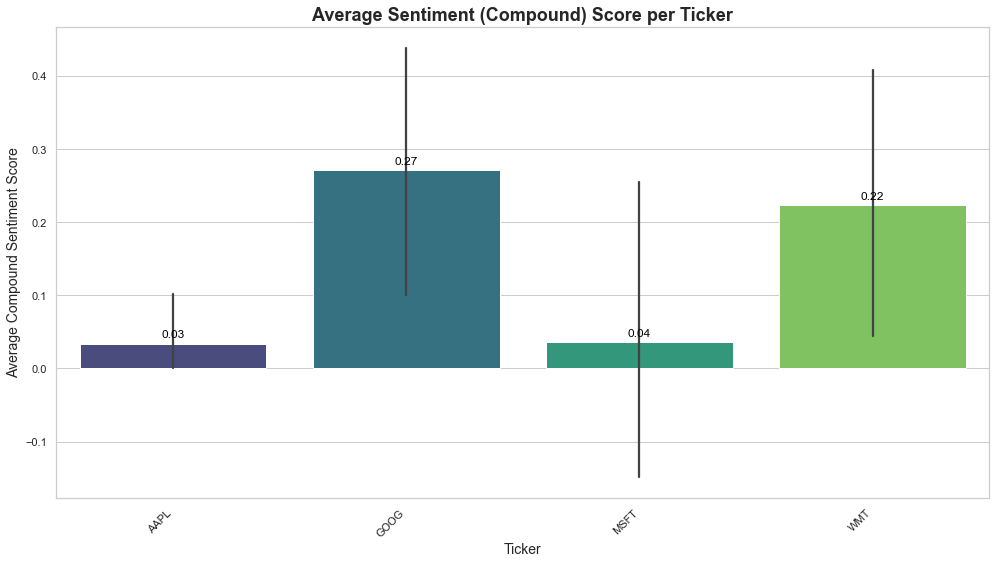

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming mean_df has already been prepared
# mean_df = mean_df.xs('compound', axis="columns").transpose()

# Set the size and style of the chart
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Create the bar chart
bar_chart = sns.barplot(data=mean_df, palette="viridis")

# Customize the plot
plt.title('Average Sentiment (Compound) Score per Ticker', fontsize=18, weight='bold')
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('Average Compound Sentiment Score', fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate tick labels for better readability
plt.tight_layout()

# Add value labels on top of the bars
for p in bar_chart.patches:
    bar_chart.annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=12, color='black', 
                       xytext=(0, 9), textcoords='offset points')

# Show the plot
plt.show()
